In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

In [282]:
source_table = pd.Series()

In [286]:
def get_packet_counts(G, n = 20, min_delay = 1, max_delay = 15, netflix_bias = 0.7, 
                      output_nodes = 1, num_pings = 100, num_days = 36):
    global source_table
    pos = nx.spring_layout(G)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    random.seed(42)

    for e in G.edges():
        G[e[0]][e[1]]['weight'] = random.randint(min_delay, max_delay)
#         G[e[0]][e[1]]['weight'] = 1

    len_path = dict(nx.all_pairs_dijkstra_path(G))

    packet_count = pd.DataFrame(columns = list(G.nodes()))

    for i in range(num_days):
        packet_count = packet_count.append(pd.Series(np.zeros(n), name = 'Day'+str(i)))
        for j in range(num_pings):
            if random.randint(0, 1)==1:
                source = i%18
            else:
                source = random.randint(0, n - 2*output_nodes-1)
#             source = random.randint(0,5)
            source_table = source_table.append(pd.Series(source))
            bias = (random.uniform(0,1) < netflix_bias)
            dest = random.randint(n-(bias + 1)*output_nodes, n-(bias)*output_nodes-1)
            path = len_path[source][dest]
#             print("source:", source, "dest: ", dest, "path: ", path)
            for node in path:
                packet_count.loc['Day'+str(i)][node] += 1                          
    return packet_count        
modifier = '_random_delay_200days_equalbias'

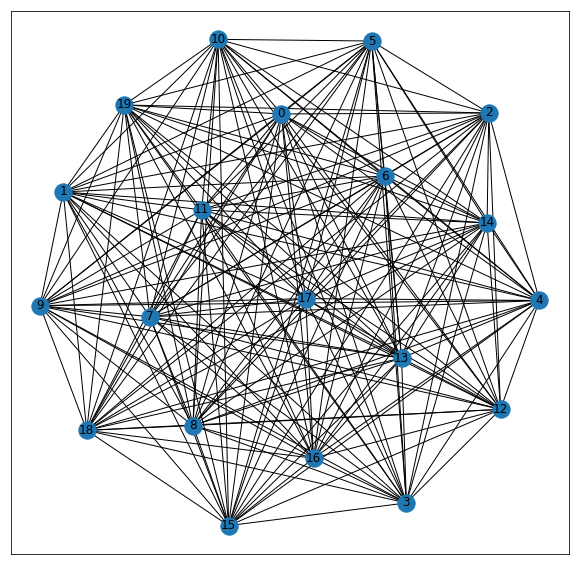

In [68]:
g1 = nx.complete_graph(20)
df = get_packet_counts(g1, netflix_bias=0.7, num_days=200)
df.to_csv('complete_graph_counts'+modifier+'.csv')

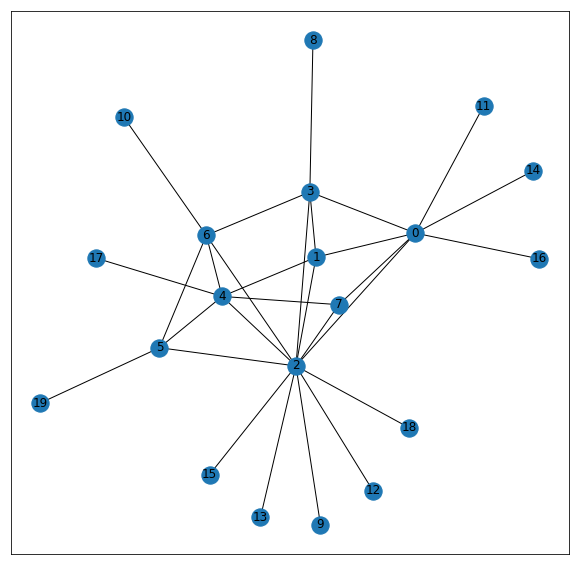

In [287]:
plt.rcParams['figure.figsize']=[10,10]
g2 = nx.random_internet_as_graph(20, 1)
df = get_packet_counts(g2, netflix_bias=0.5, num_days=200)
df.to_csv('AS_graph_counts'+modifier+'.csv')
plt.savefig("AS_graph"+modifier+".png", format="PNG")

In [289]:
source_table.value_counts()

0     1171
12    1166
1     1142
4     1136
17    1123
3     1123
15    1118
10    1118
2     1113
14    1109
7     1100
13    1097
8     1092
16    1092
9     1091
6     1090
11    1070
5     1049
dtype: int64

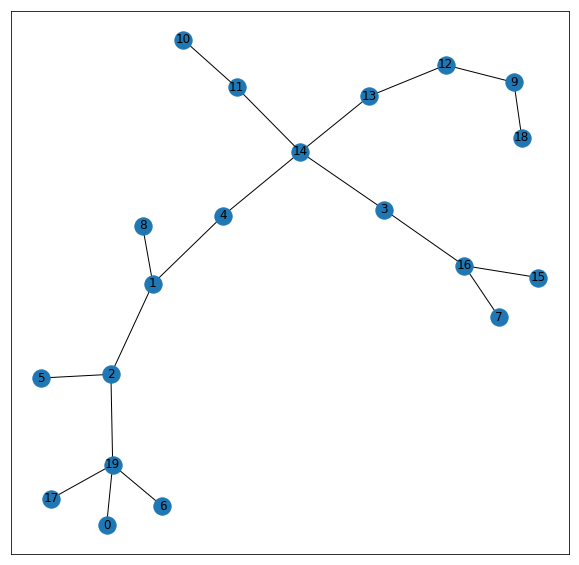

In [84]:
g3 = nx.random_tree(20, 37)
df = get_packet_counts(g3, netflix_bias=0.5, num_days=2)
df.to_csv('tree_graph_counts'+modifier+'.csv')
plt.savefig("tree_graph"+modifier+".png", format="PNG")

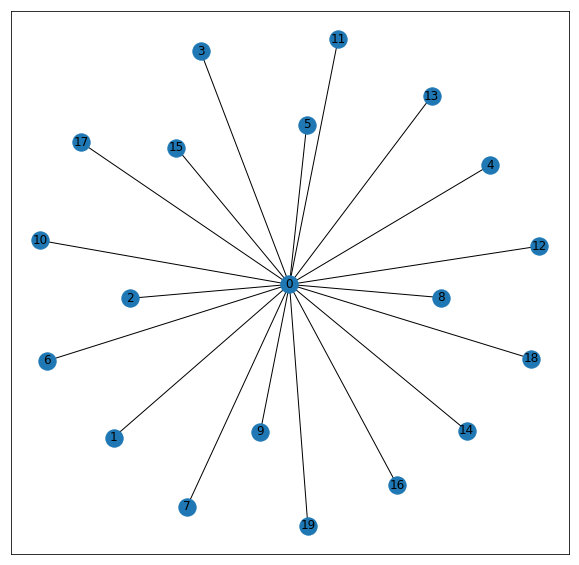

In [66]:
g4 = nx.star_graph(19)
df = get_packet_counts(g4, netflix_bias=0.7, num_days=200)
df.to_csv('star_graph_counts'+modifier+'.csv')

In [ ]:
pos = nx.spring_layout(g1)
nx.draw_networkx_labels(g1, pos)
nx.draw_networkx_nodes(g1,pos)
nx.draw_networkx_edges(g1,pos)
plt.savefig("complete_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g2)
nx.draw_networkx_labels(g2, pos)
nx.draw_networkx_nodes(g2,pos)
nx.draw_networkx_edges(g2,pos)
plt.savefig("AS_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g3)
nx.draw_networkx_labels(g3, pos)
nx.draw_networkx_nodes(g3,pos)
nx.draw_networkx_edges(g3,pos)
plt.savefig("randomtree_graph.png", format="PNG")

In [ ]:
pos = nx.spring_layout(g4)
nx.draw_networkx_labels(g4, pos)
nx.draw_networkx_nodes(g4,pos)
nx.draw_networkx_edges(g4,pos)
plt.savefig("star_graph.png", format="PNG")

## GETTING EDGES

In [290]:
g2_edge_dict = {}
for edge in list(g2.edges()):
    if str(edge[0]) in g2_edge_dict.keys() and str(edge[1]) not in g2_edge_dict[str(edge[0])]:
        g2_edge_dict[str(edge[0])].append(str(edge[1]))
    if str(edge[1]) in g2_edge_dict.keys() and str(edge[0]) not in g2_edge_dict[str(edge[1])]:
        g2_edge_dict[str(edge[1])].append(str(edge[0]))
    if str(edge[0]) not in g2_edge_dict.keys():
        g2_edge_dict[str(edge[0])]=[str(edge[1])]
    if str(edge[1]) not in g2_edge_dict.keys():
        g2_edge_dict[str(edge[1])]=[str(edge[0])]
# g2_edge_dict

In [291]:
g3_edge_dict = {}
for edge in list(g3.edges()):
    if str(edge[0]) in g3_edge_dict.keys() and str(edge[1]) not in g3_edge_dict[str(edge[0])]:
        g3_edge_dict[str(edge[0])].append(str(edge[1]))
    if str(edge[1]) in g3_edge_dict.keys() and str(edge[0]) not in g3_edge_dict[str(edge[1])]:
        g3_edge_dict[str(edge[1])].append(str(edge[0]))
    if str(edge[0]) not in g3_edge_dict.keys():
        g3_edge_dict[str(edge[0])]=[str(edge[1])]
    if str(edge[1]) not in g3_edge_dict.keys():
        g3_edge_dict[str(edge[1])]=[str(edge[0])]
# g3_edge_dict

In [356]:
data_file = open('143 data/tree_arcs_loglik_hc_skeleton.txt', 'r')
lines = data_file.readlines()

In [357]:
edge_dict = {}
for line in lines:
    path = line.split()
    if path[0] in edge_dict.keys() and path[1] not in edge_dict[path[0]]:
        edge_dict[path[0]].append(path[1])
    if path[0] not in edge_dict.keys():
        edge_dict[path[0]]=[path[1]]
# edge_dict

In [358]:
count = 0
for s in edge_dict:
    for d in edge_dict[s]:
        if d in g3_edge_dict[s]:
            count+=1
print("Proportion of real-found edges to all real edges:",count/len(list(g2.edges()))/2)
print("1- Proportion of real-found edges to all found edges:",1 - count/len(lines))

Proportion of real-found edges to all real edges: 0.6551724137931034
1- Proportion of real-found edges to all found edges: 0.8582089552238806


# Graphing scores

In [434]:
scores = pd.read_csv('143 data/proportion scores for tree and AS.csv', header = None)
scores2 = pd.read_csv('143 data/old/proportion scores for tree and AS.csv', header = None)
scores = scores.append(scores2)
scores = scores.reset_index()
scores.head()
scores.drop(['index'], axis=1)

,0,1,2
0,AS_aic_hc_skeleton,0.896552,0.704545
1,AS_aracne_undirected,0.482759,0.533333
2,AS_bic_hc_skeleton,0.758621,0.511111
3,AS_chowliu_undirected,0.413793,0.368421
4,AS_cor_fastiamb_undirected,0.620690,0.379310
5,AS_cor_gs_undirected,0.551724,0.407407
6,AS_cor_pc_undirected,0.517241,0.400000
7,AS_loglik_hc_skeleton,1.000000,0.801370
8,tree_aic_hc_skeleton,0.620690,0.632653
9,tree_aracne_undirected,0.517241,0.347826


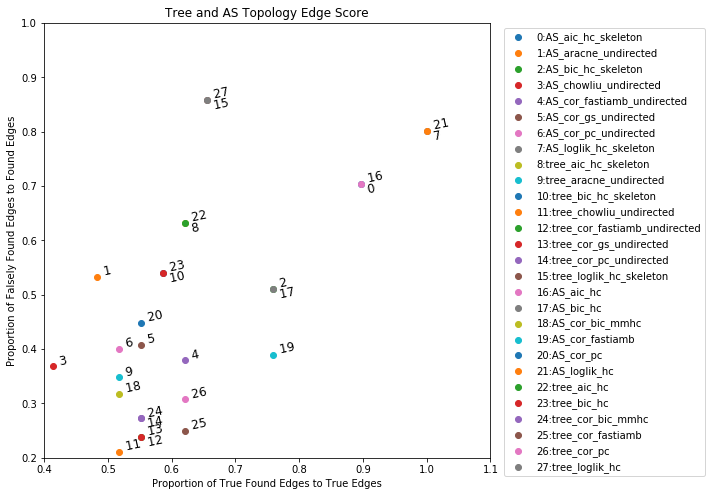

In [435]:
plt.rcParams['figure.figsize']=[8,8]
fig, ax = plt.subplots()
y = scores.iloc[:, 3]
z = scores.iloc[:,2]
for i in range(28):
    ax.scatter(scores.iloc[i,2],scores.iloc[i,3], label=str(i)+':'+scores.iloc[i,1])

    
overlapping=[7, 0, 15, 8, 17, 10, 12, 14]    
for i, txt in enumerate(n):
    if i in overlapping:
        ax.text(z[i], y[i]-0.02,"  "+str(i), fontsize=12, rotation=12, rotation_mode='anchor')
    else:
        ax.text(z[i], y[i],"  "+str(i), fontsize=12, rotation=12, rotation_mode='anchor')
    
    
    
ax.set_xlabel("Proportion of True Found Edges to True Edges")
ax.set_ylabel("Proportion of Falsely Found Edges to Found Edges")
ax.set_title("Tree and AS Topology Edge Score")
ax.set_ylim([0.2,1])
ax.set_xlim([0.4,1.1])
plt.legend(bbox_to_anchor=(1.02, 1))
plt.savefig("edge_scores.png", format="PNG")


In [437]:
distances = np.sqrt(scores[2]**2 + (1-scores[1])**2)
distances.sort_values(ascending=True)

25    0.454287
19    0.457710
26    0.488417
13    0.507583
12    0.507583
14    0.524720
24    0.524720
11    0.526666
4     0.536426
2     0.565242
17    0.565242
18    0.578183
9     0.595012
5     0.605749
6     0.626942
20    0.633958
23    0.680741
10    0.680741
3     0.692367
0     0.712100
16    0.712100
22    0.737649
8     0.737649
1     0.742956
21    0.801370
7     0.801370
15    0.924894
27    0.924894
dtype: float64